# Results

This notebook is used to show the results of the experiments. Note that the paths specified below contain the seeds of the best of the five runs (As explained in the thesis, each run was performed 5 times with different preset random seeds). 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["text.usetex"] = True

In [2]:
def plot_trajectory(path, start = 0, end = 2800, dataset_id = '1/2016', price = False):
    '''
    Plots control trajectory

            Parameters:
                    path (str): String to file containing data of the control trajectory. 
                    The file is created by `get_statistics()` in helper.py 
                    
                    start (int): start time step
                    end (int): end time step
                    dataset_id (str): MM/YYYY 
                    price (bool): True in case of a demand response scenario

            Returns:
                    stats (obj): data read from the statistics file read from the `path` specified above
    '''
    
    y_label = 'Temperature in °C'
    if price:
        y_label = 'Temperature in °C // price in cent per kWh'
    stats = pd.read_csv(path)
    
    # Set datetime index for dates in plot 
    date_index = pd.date_range(start = pd.to_datetime(dataset_id), periods = len(stats), freq='900S').to_pydatetime().tolist()
    stats = stats.set_index(pd.Series(date_index))
    
    plot_data = stats[stats['dataset_id']==dataset_id][start:end]

    fig, ax = plt.subplots()

    ax.plot(plot_data['t_amb'], label = r'$T_{out}$')
    ax.plot(plot_data['t_indoor'], label = r'$T_{in}$')
    if price:
        ax.plot(plot_data['price']/10, label = 'Price')
    ax1 = ax.twinx()
    ax1.plot(plot_data['Q_HP'], label = r'$\dot{Q}_{hp}$', color = 'black')
    ax.grid()
    ax.tick_params(axis='x', labelsize=14, labelrotation=30)
    ax.tick_params(axis='y', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax1.set_ylabel('Thermal heat pump power [kW]', fontsize=14)
    
    fig.legend(bbox_to_anchor=[0.5, 0.95], loc = 'center', ncol=5, prop={'size': 16})
    return stats

In [3]:
COLUMNS = ['dataset_id', 'comfort_deviation', 't_indoor', 'Q_el_HP', 'Q_HP']

# Experiment 1: Efficient Control Strategies

## Old Building

In [4]:
rl_path = '../models/energy_efficient_heat_pump_operation/old/43/test.csv'
mpc_path = '../baseline_results/mpc_old_building_efficient_control.csv'
heat_curve_path = '../baseline_results/heat_curve_old_building_control.csv'

,comfort_deviation,t_indoor,Q_el_HP,Q_HP
dataset_id,,,,
1/2016,0.004502,21.019273,531.133664,6.726675
10/2016,0.003140,21.028186,217.487216,4.023880
11/2016,0.001258,21.021464,344.676474,5.374438
12/2016,0.003167,21.025668,489.395397,6.670197
2/2016,0.001056,21.025085,439.285265,6.231758
3/2016,0.004446,21.022157,409.200134,5.908117


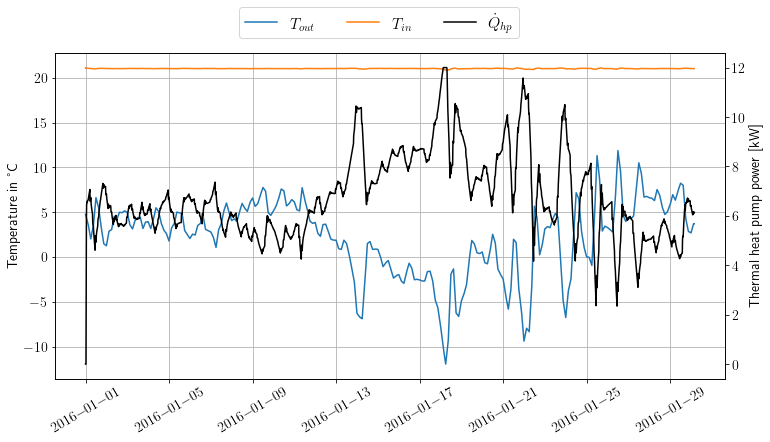

In [5]:
rl_stats_old = plot_trajectory(rl_path)
rl_stats_old[COLUMNS].groupby('dataset_id').mean()

,comfort_deviation,t_indoor,Q_el_HP,Q_HP
dataset_id,,,,
1/2016,0.023543,20.984715,528.721524,6713.123973
10/2016,0.012778,20.998959,216.645728,4012.406734
11/2016,0.016984,20.984941,343.026361,5359.371360
12/2016,0.022321,20.993780,486.870322,6656.837250
2/2016,0.020348,20.983136,437.029092,6215.119649
3/2016,0.019920,20.993945,407.329469,5897.167536


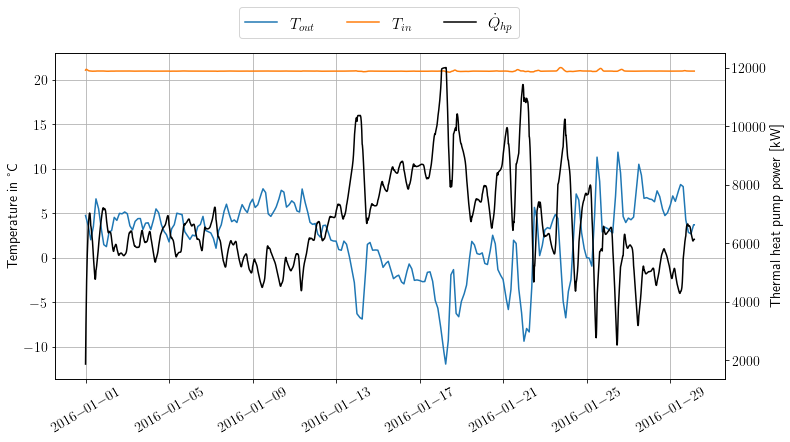

In [6]:
mpc_stats_old = plot_trajectory(mpc_path)
mpc_stats_old[COLUMNS].groupby('dataset_id').mean()

,comfort_deviation,t_indoor,Q_el_HP,Q_HP
dataset_id,,,,
1/2016,0.362827,21.033965,513.845491,6762.558657
10/2016,0.000007,22.620190,267.404213,4688.492711
11/2016,0.033455,21.872542,373.077823,5723.429254
12/2016,0.101003,21.102462,488.313521,6712.085736
2/2016,0.090279,21.349348,448.981226,6386.665232
3/2016,0.083627,21.520484,424.317525,6145.201180


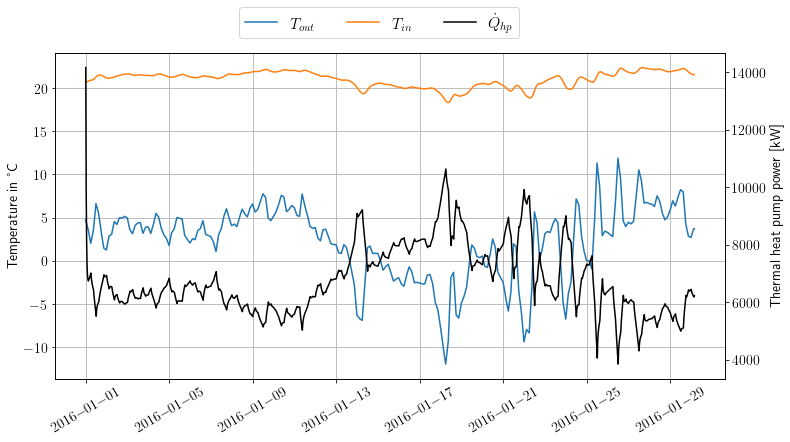

In [7]:
heat_curve_stats_old = plot_trajectory(heat_curve_path)
heat_curve_stats_old[COLUMNS].groupby('dataset_id').mean()

## Efficient Building

In [8]:
rl_path = '../models/energy_efficient_heat_pump_operation/efficient/42/test.csv'
mpc_path = '../baseline_results/mpc_efficient_building_efficient_control.csv'
heat_curve_path = '../baseline_results/heat_curve_efficient_building_control.csv'

comfort_deviation      0.000447
t_indoor              21.026952
Q_el_HP              138.081933
Q_HP                   2.666005
dtype: float64

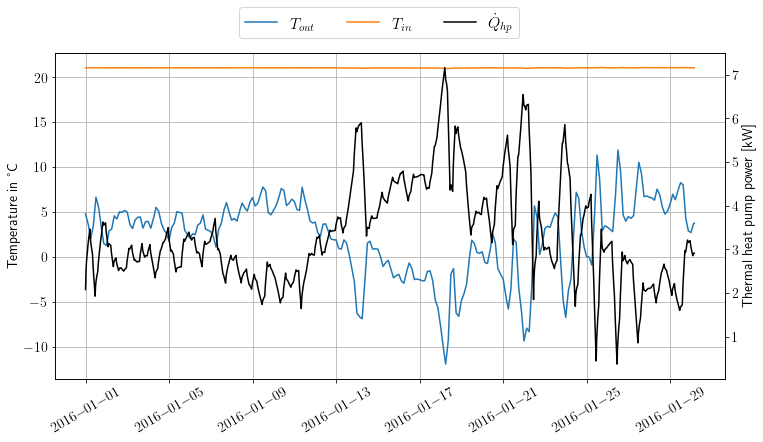

In [9]:
rl_stats_efficient = plot_trajectory(rl_path)
rl_stats_efficient[COLUMNS].mean()

comfort_deviation       0.007662
t_indoor               21.048399
Q_el_HP               136.667831
Q_HP                 2673.863939
dtype: float64

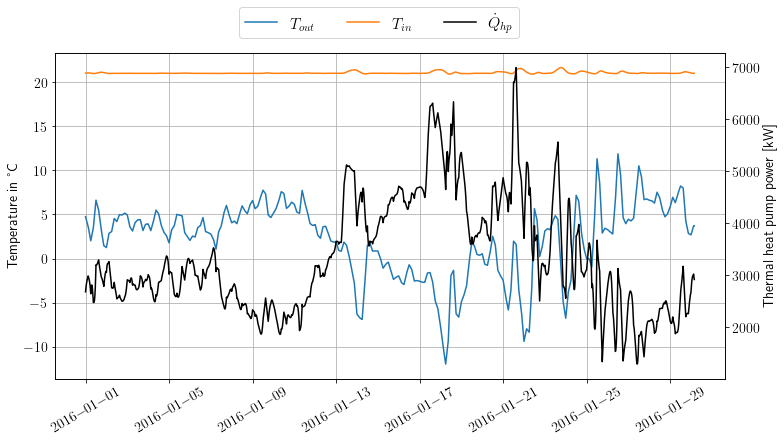

In [10]:
mpc_stats_efficient = plot_trajectory(mpc_path)
mpc_stats_efficient[COLUMNS].mean()

comfort_deviation       0.103280
t_indoor               21.178997
Q_el_HP               142.419484
Q_HP                 2657.882345
dtype: float64

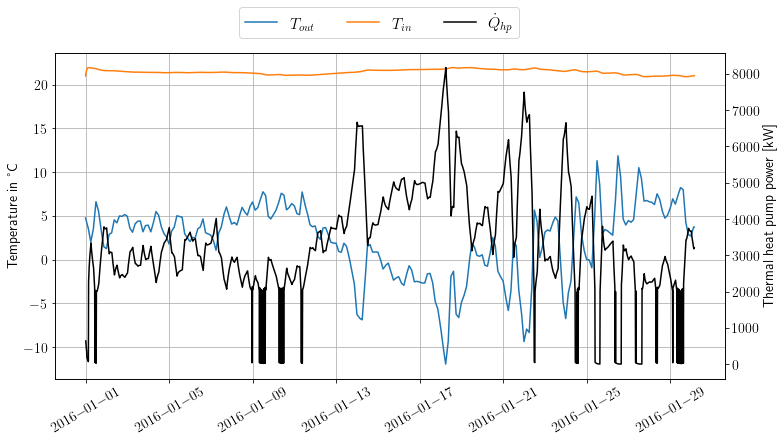

In [11]:
heat_curve_stats_efficient = plot_trajectory(heat_curve_path)
heat_curve_stats_efficient[COLUMNS].mean()

## Efficient Enhanced 

In [12]:
rl_path = "../models/energy_efficient_heat_pump_operation/efficient_enhanced/44/test.csv"
mpc_path = '../baseline_results/mpc_efficient_enhanced_building_efficient_control.csv'
heat_curve_path = '../baseline_results/heat_curve_efficient_enhanced_building_efficient_control.csv'

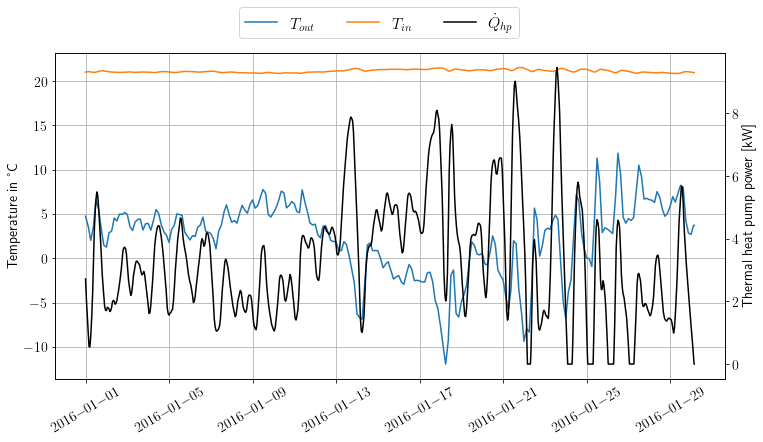

In [13]:
rl_stats_efficient_enhanced = plot_trajectory(rl_path)

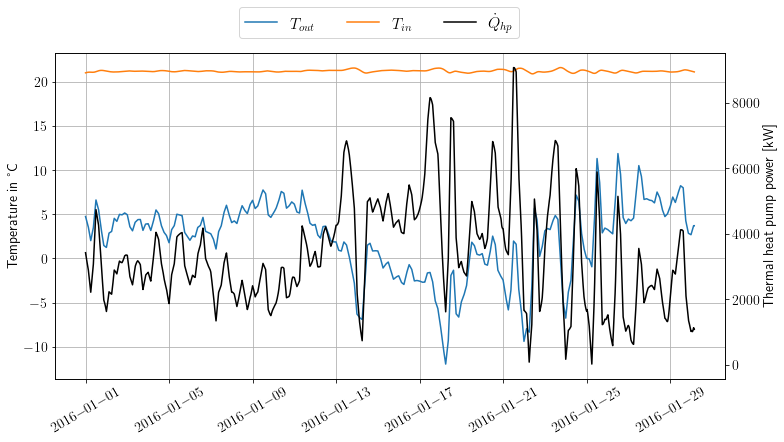

In [14]:
mpc_stats_efficient_enhanced = plot_trajectory(mpc_path)

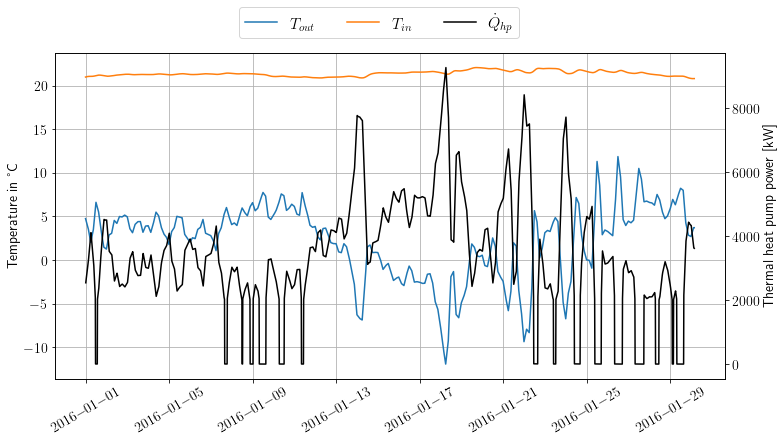

In [15]:
heat_curve_stats_efficient_enhanced = plot_trajectory(heat_curve_path)

# Demand Response

Due to licence agreements, the price data is private. Thus, no plots here :-(

# Robustness

In [16]:
rl_old = '../models/energy_efficient_heat_pump_operation/old/43/noise-sensor0501-forecast.csv'
rl_efficient = '../models/energy_efficient_heat_pump_operation/efficient/42/noise-sensor0501-forecast.csv'
rl_efficient_enhanced = '../models/energy_efficient_heat_pump_operation/efficient_enhanced/44/noise-sensor0501-forecast.csv'
rl_efficient_mitigated = '../models/noise/efficient/46/noise-sensor0501-forecast.csv'

mpc_old = '../baseline_results/robustness/mpc_old_building_noise.csv'
mpc_efficient = '../baseline_results/robustness/mpc_efficient_building_noise.csv'
mpc_efficient_enhanced = '../baseline_results/robustness/mpc_efficient_enhanced_building_noise.csv'

## Old Building

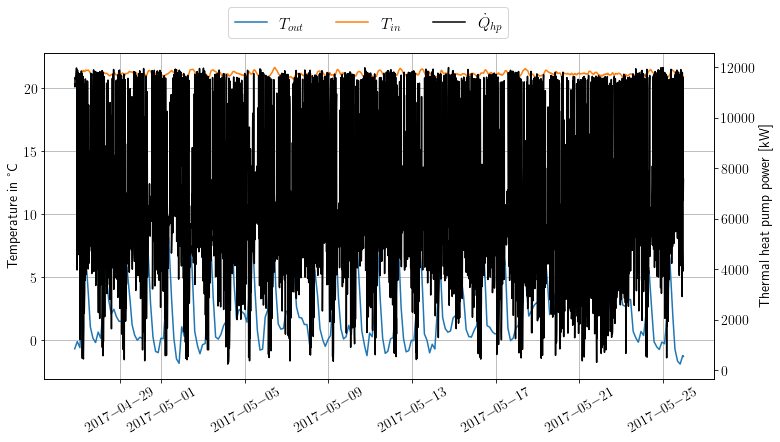

In [17]:
stats = plot_trajectory(mpc_old, start= 0, end=2800, dataset_id='12/2016',price=False)

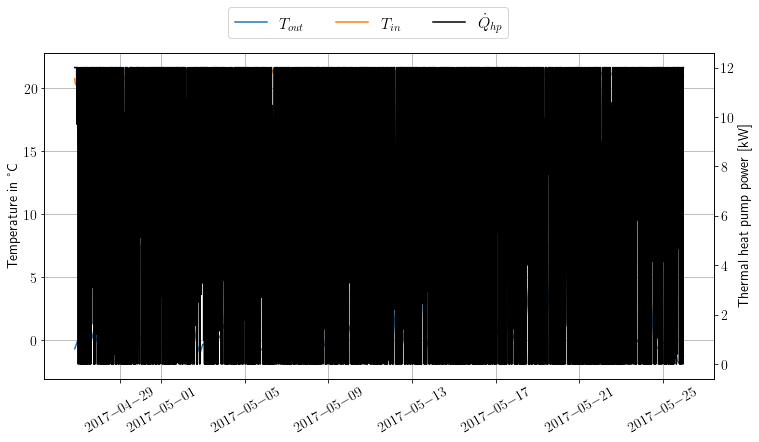

In [18]:
stats = plot_trajectory(rl_old, start= 0, end=2800, dataset_id='12/2016',price=False)

## Efficient Building

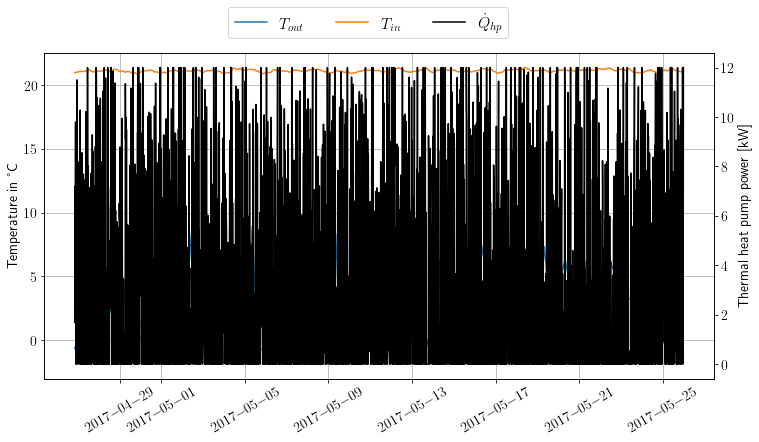

In [19]:
stats = plot_trajectory(rl_efficient, start= 0, end=2800, dataset_id='12/2016', price=False)

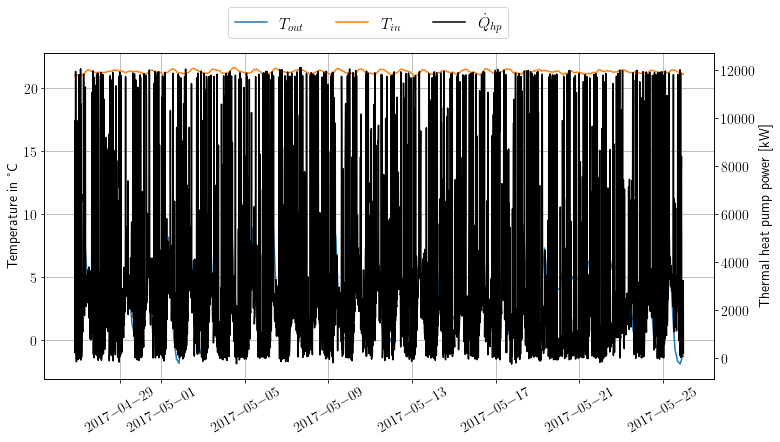

In [20]:
stats = plot_trajectory(mpc_efficient, start= 0, end=2800, dataset_id='12/2016', price=False)

## Efficient Enhanced

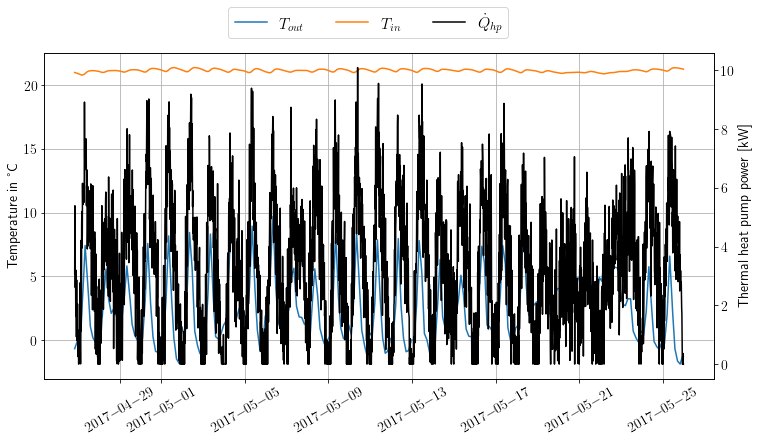

In [21]:
stats = plot_trajectory(rl_efficient_enhanced, start= 0, end=2800, dataset_id='12/2016', price=False)

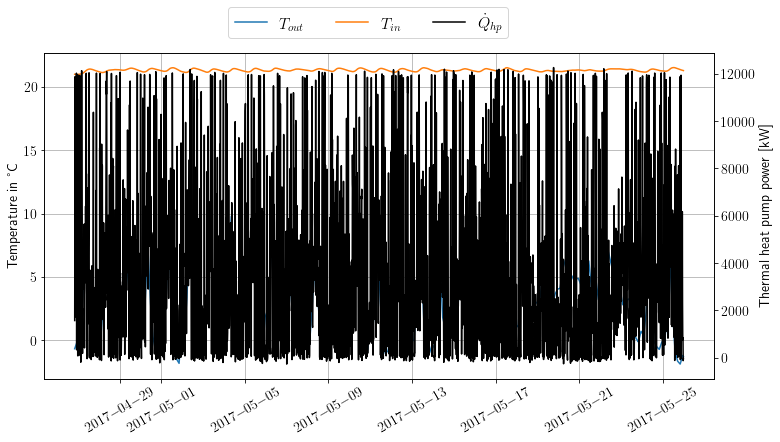

In [22]:
stats = plot_trajectory(mpc_efficient_enhanced, start= 0, end=2800, dataset_id='12/2016', price=False)

## Noise Mitigation Experiment Efficient Building

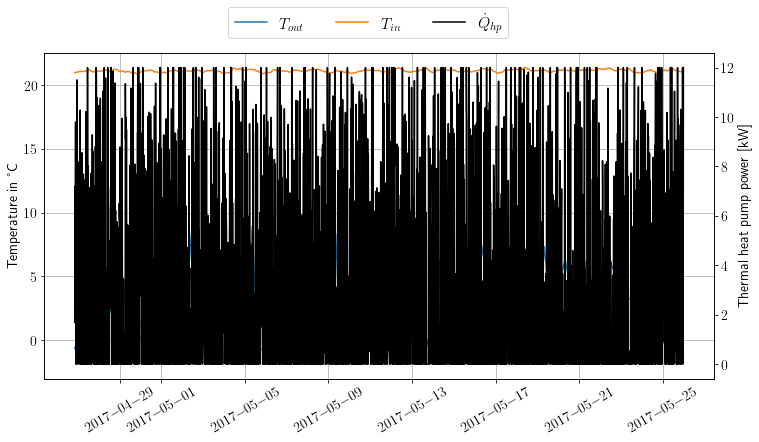

In [23]:
# Without Training Noise
stats = plot_trajectory(rl_efficient, start= 0, end=2800, dataset_id='12/2016', price=False)

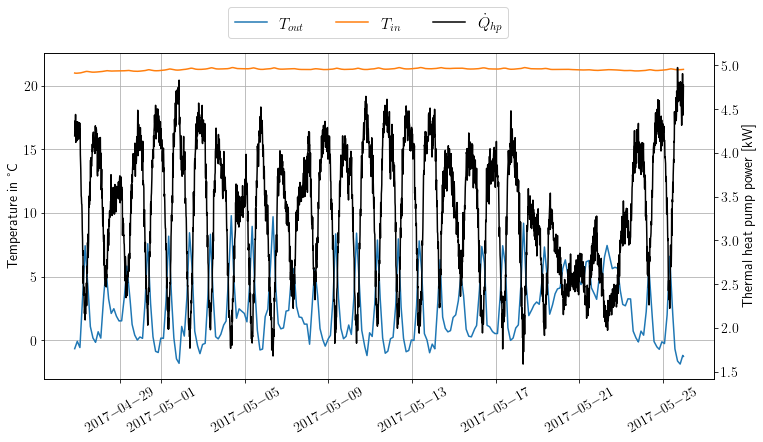

In [24]:
# With Training Noise and Domain Randomization
stats = plot_trajectory(rl_efficient_mitigated, start= 0, end=2800, dataset_id='12/2016', price=False)